# Music Genre Classification 🎵
### Frank Sosa, Thomas Langford, Jasmine Wang, Kelly Thai
In this project, we sought to classify the genres of songs using a variety of features from Spotify. The dataset was sourced from Kaggle at this [link](https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=train.csv).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter("ignore")

In [4]:
original_data = pd.read_csv("data/music_records.csv")
original_data.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

## Mapping of Class Numbers to Genres
| #   | Genre        |
| --- | -------------|
| 0   | acoustic/folk|
| 1   | alt music    |
| 2   | blues        |
| 3   | bollywood    |
| 4   | country      |
| 5   | hip hop      |
| 6   | indie        |
| 7   | instrumental |
| 8   | metal        |
| 9   | pop          |
| 10  | rock         |

## Data Exploration

In [3]:
print("Total number of records:", original_data.shape[0])
print("Total number of features:", original_data.shape[1])

Total number of records: 17996
Total number of features: 17


The total number of records is relatively large, so we hope that this will provide sufficient data to detect genre patterns. Since we have a fairly large number of features, we intend to conduct dimensionality reduction for some classifiers using PCA. 

In [4]:
original_data.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

From this table, we can observe that some features have missing values because their count is less than other features. This is something we will handle in data cleaning. We can also see that the features are on very different scales, but this will be addressed by scaling our data.

## Class Distribution
From the graph, we can see that the Rock class (class 10) has double the amount of any other class. This class imbalance will definitely affect our classification as we will have to be careful when evaluating our models to make sure that their accuracy is reflective of their performance on all classes and is not just always predicting the more common classes. We will also try classifying with the existing distribution and also compare it to a binary classification of Rock vs. not Rock.

<AxesSubplot:title={'center':'Class Counts'}, xlabel='Class'>

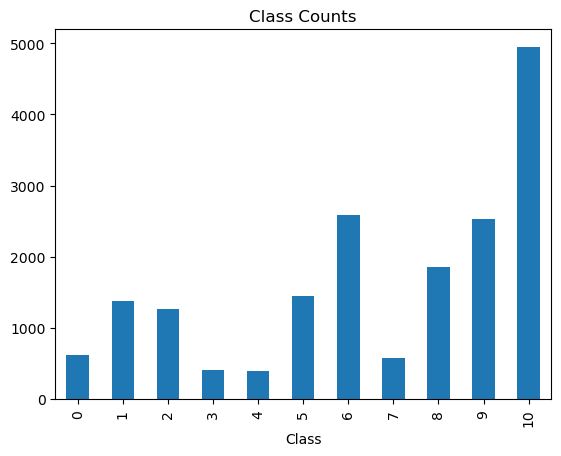

In [6]:
class_counts = original_data.groupby('Class').size()
class_counts.plot(kind='bar', title='Class Counts')

## Feature Distributions
Below, we plotted a histogram for each feature (excluding the class and duration*) to see how they are distributed. For the remaining features, we can see that they have a variety of distribution patterns and are on different scales, so we will need to scale our data for some classifiers.

*We did not plot the duration_in min/ms feature here because it required some special attention, which is handled in the next section of the notebook

[]

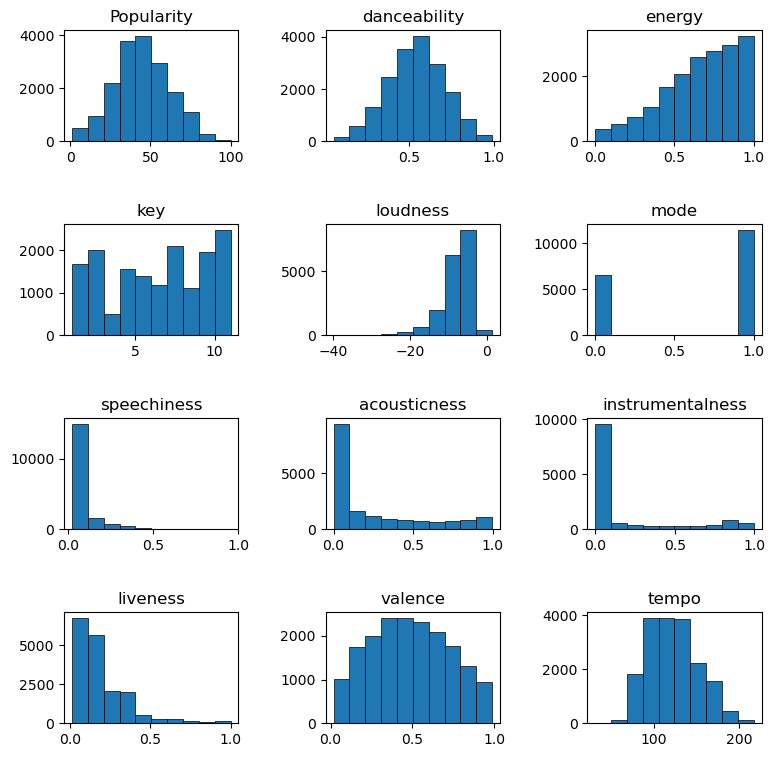

In [7]:
f,a = plt.subplots(4,3, figsize=(9,9))
a = a.ravel()
titles = ["Popularity", "danceability", "energy", "key", "loudness","mode","speechiness","acousticness", "instrumentalness","liveness","valence", "tempo"]
for idx,ax in enumerate(a):
    ax.hist(original_data[titles[idx]], edgecolor='black', linewidth=.5)
    ax.set_title(titles[idx])
f.subplots_adjust(wspace=0.5, hspace=0.75)
plt.plot()

## Duration Column Weirdness
By looking at the column name and the head of the dataframe, we realized that the duration column was a little strange. The duration was given in either minutes or milliseconds for each of the tracks. The graph below shows the distribution of the original duration column without any adjustments. We can see from the two peaks in the graph that there is a distinct separation between the values recorded in minutes and the ones recorded in milliseconds. The first peak (very close to 0.0 x 10^6) represents the values in minutes. The larger peak shows the distribution of values recorded in milliseconds. We can see that a majority of the values are recorded in milliseconds.

[Text(0.5, 1.0, 'duration_in min/ms')]

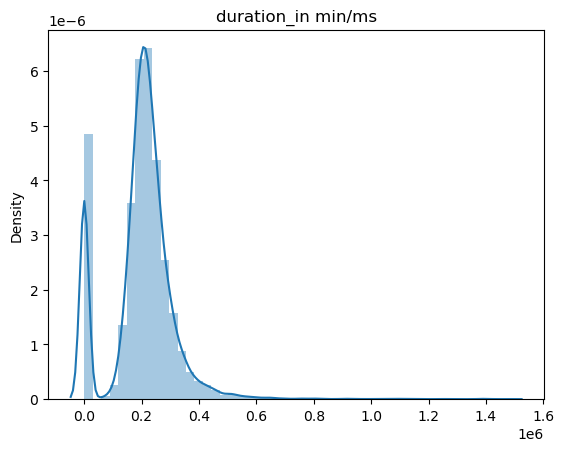

In [8]:
plt.figure()
sns.distplot(x=original_data["duration_in min/ms"]).set(title="duration_in min/ms")

We also investigated this further by seeing the distribution of this particular metric per class. From the graphs below, we saw that some classes were primarily recorded in units of minutes while others were primarily in milliseconds, or a combination of both. This is evident from the vastly different scales on the x-axes of the graphs. For example, acoustic/folk is on a scale of 0 to 20 while blues is on a scale of 0 to 1,000,000. This likely indicates that acoustic/folk songs had their duration recorded in minutes while blues songs were recorded in ms.

Out of curiousity, we used a Lazy Classifier to compare the results of fixing the duration vs. not fixing it. We noticed that using the original, non-adjusted values resulted in around 10% more accuracy across the board. This makes sense because the classifiers could take advantage of the patterns resulting from differences in the way that duration was recorded for different genres. For example, it could use the fact that the acoustic/folk was recorded in minutes (and thus had very small values) to distinguish it from other genres. This produced good results when classifying the test data because the test data was gathered in the same way as the training data.

![image.png](lazy_classifier_compare.jpg)

Despite seeing large improvements in accuracy when we didn't fix the duration values, we knew that we needed to fix them in data cleaning. If we didn't fix them, this would be a source of data leakage since the classifiers would potentially be able to use this information to identify genres more easily, but this would not be a naturally occurring pattern in any data outside of this dataset. As a result, our classifiers would appear to perform well on our data but would not be able to effectively classify new data.

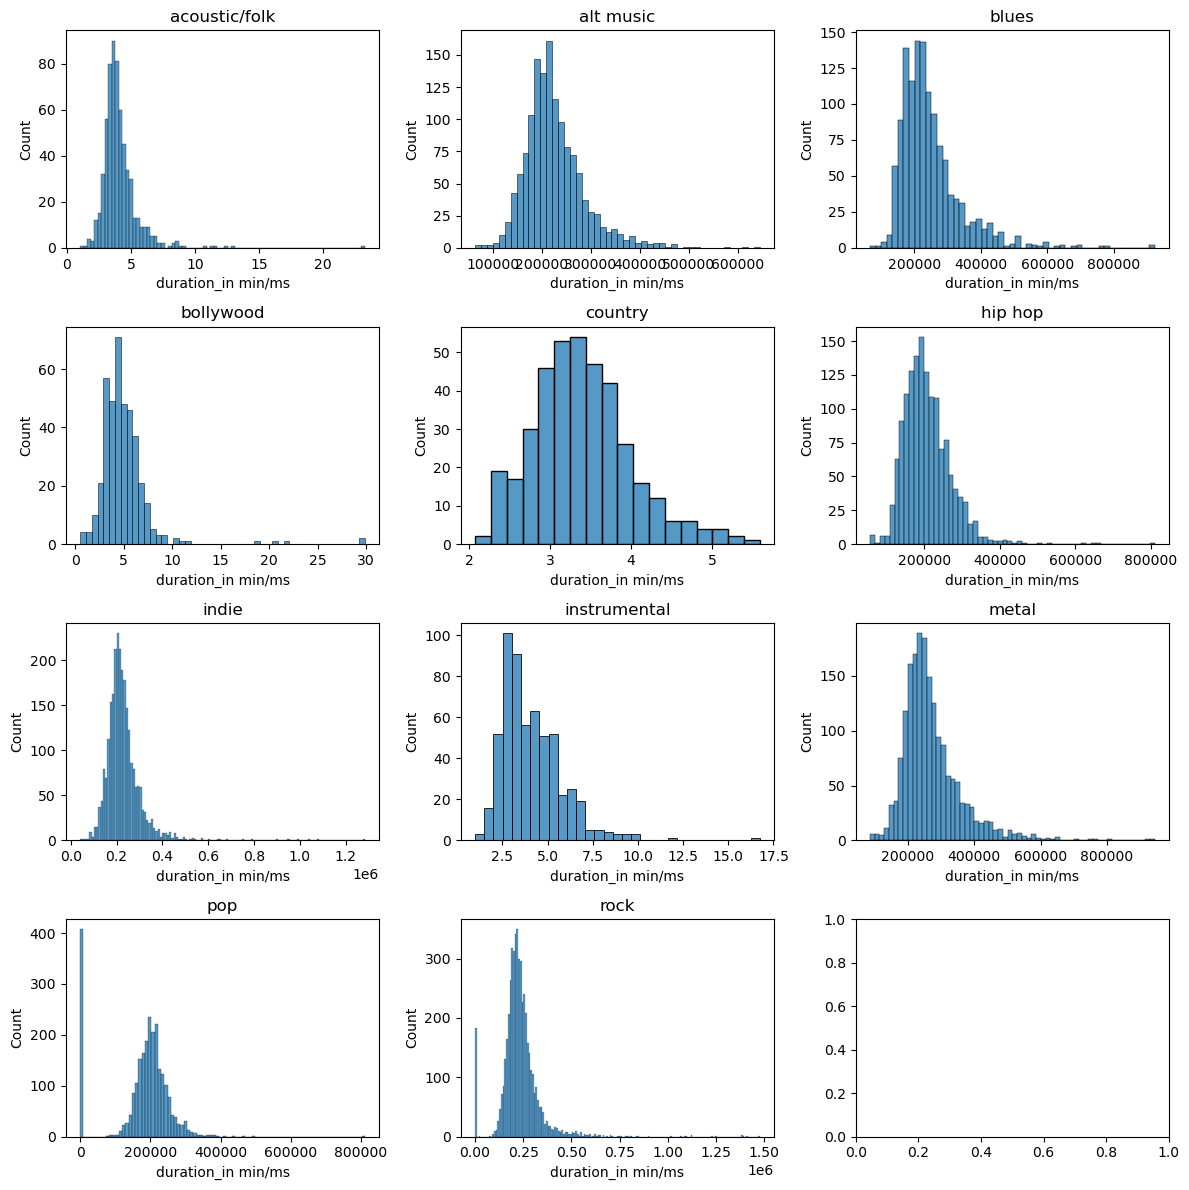

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
classes = ["acoustic/folk", "alt music", "blues", "bollywood", "country", "hip hop", "indie", "instrumental", "metal", "pop",
          "rock"]
for i, ax in zip(range(11), axes.flat):
    if i >= 11:
        ax.axis('off')
        continue
    sns.histplot(x=original_data[original_data["Class"] == i]["duration_in min/ms"], ax=ax)
    ax.set(title=classes[i])
plt.tight_layout()
plt.show()

## Correlation Plot
The feature columns that have null values don't correlate highly with any other features, so a similar case imputation doesn't make much sense here. Thus, we will impute by the mean of the class using a simple imputer in the pipeline for each classifier.

<AxesSubplot:>

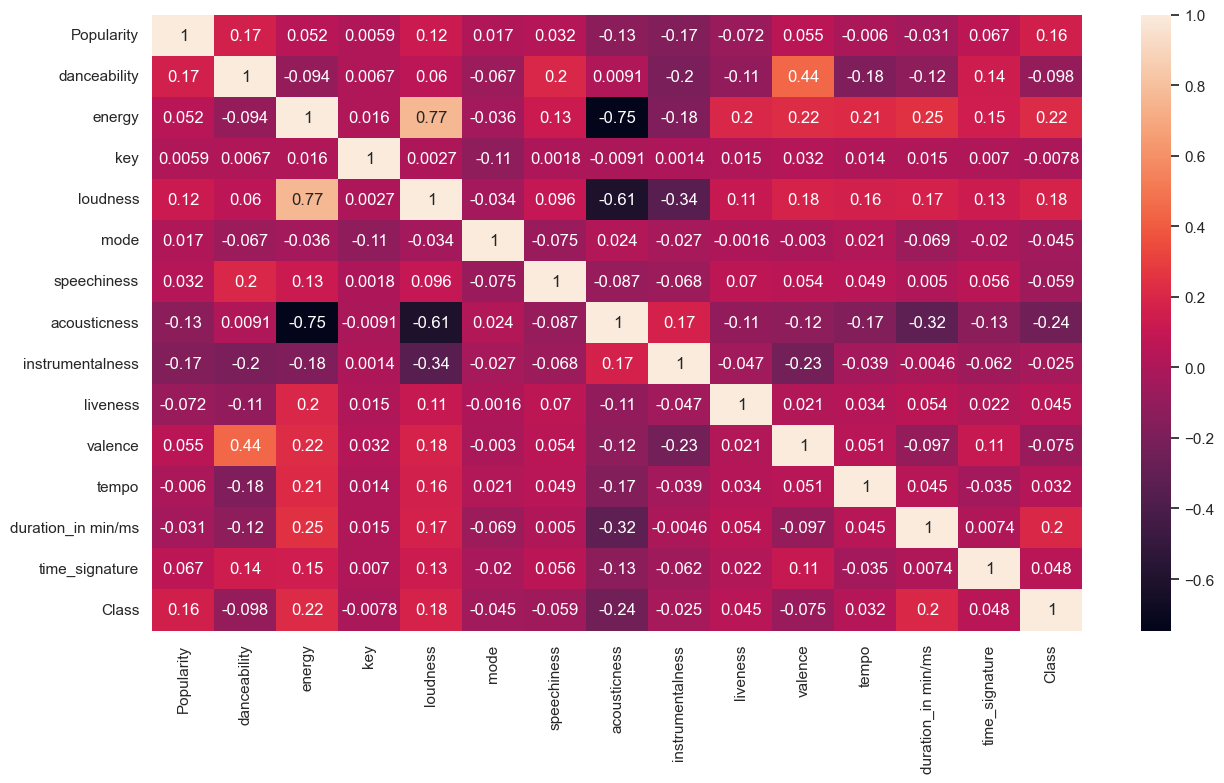

In [10]:
sns.set(rc = {"figure.figsize": (15,8)})
sns.heatmap(original_data.corr(), annot=True)

# Data Cleaning
From our exploration, we noticed that we needed to make a few changes to prepare our data:
* Duration is either in milliseconds or in minutes and needs to be made consistent
* We should drop the artist name and track name columns because they are categorical and would not be very useful in classification

## Handling Null Values
From the tables below, we can see that there are only 3 columns that contain null values.
Initially, we tried dropping the null values. Later, we decided to try imputing the values as well. When running our classifiers, we compared the results with dropping the null values vs. imputing.

In [11]:
original_data.isnull().groupby(original_data["Class"]).sum()

Artist Name  Track Name  Popularity  danceability  energy  key  \
Class                                                                   
0                0           0          74             0       0   69   
1                0           0          29             0       0  157   
2                0           0          15             0       0  185   
3                0           0          14             0       0   31   
4                0           0          20             0       0   42   
5                0           0          22             0       0  119   
6                0           0          43             0       0  288   
7                0           0          29             0       0   87   
8                0           0          32             0       0  161   
9                0           0          63             0       0  303   
10               0           0          87             0       0  572   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
Class                                                                          
0             0     0            0             0               138         0   
1             0     0            0             0               175         0   
2             0     0            0             0               142         0   
3             0     0            0             0                97         0   
4             0     0            0             0               207         0   
5             0     0            0             0               869         0   
6             0     0            0             0               257         0   
7             0     0            0             0                 1         0   
8             0     0            0             0               157         0   
9             0     0            0             0              1261         0   
10            0     0            0             0              1073         0   

       valence  tempo  duration_in min/ms  time_signature  Class  
Class                                                             
0            0      0                   0               0      0  
1            0      0                   0               0      0  
2            0      0                   0               0      0  
3            0      0                   0               0      0  
4            0      0                   0               0      0  
5            0      0                   0               0      0  
6            0      0                   0               0      0  
7            0      0                   0               0      0  
8            0      0                   0               0      0  
9            0      0                   0               0      0  
10           0      0                   0               0      0

In [12]:
print(f"Total number of missing values: \n{original_data.isnull().sum()}")

Total number of missing values: 
Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


### Drop Null Values

In [6]:
# Dropping rows with null values & prove that we don't have any null values anymore
data = original_data.dropna()
print(f"Total number of missing values: \n{data.isnull().sum()}")

# Splitting off class labels
labels = data["Class"]
data = data.drop("Class", axis=1)

# Fix duration column & drop appropriate columns
data['duration'] = data['duration_in min/ms'].apply(lambda x: x * 60000 if x < 100 else x)
data = data.drop(['duration_in min/ms', 'Artist Name', 'Track Name'], axis=1)

Total number of missing values: 
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


### Impute Null Values

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

impute_data = original_data.copy()

# Splitting off class labels
impute_data_labels = impute_data["Class"]
impute_data = impute_data.drop("Class", axis=1)

# Fix duration column & drop appropriate columns
impute_data['duration'] = impute_data['duration_in min/ms'].apply(lambda x: x / 60000 if x > 100 else x)
impute_data = impute_data.drop(['duration_in min/ms', 'Artist Name', 'Track Name'], axis=1)

# Creating a pipeline to impute the missing values by mean
# We do this instead of actually imputing right now so that we can avoid data leakage
numeric_transformer = Pipeline(
    steps = [("imputer", SimpleImputer(strategy="mean")), 
    ("scaler", StandardScaler())])

# Binary Classification
As we saw in our data exploration, we have a pretty significant class imbalance. Rock (class 10) has many more records than any of the other classes. Consequently, we decided to try a binary classification to see if we could classify a track as Rock or non-Rock.

For this set of labels, a class label of 1 represents Rock and 0 represents non-Rock.

In [16]:
# Get binary labels for both dropped nulls and imputed data
binary_labels = labels.apply(lambda x: 1 if x == 10 else 0)
impute_binary_labels = impute_data_labels.apply(lambda x: 1 if x == 10 else 0)

# Creating Classifiers
In this section, we defined functions for various classifiers which we will use to train and test our data. For all of them, we used a pipeline to impute missing values (if there were any) and scale the data.

In [17]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree(data_a, labels_a):    
    dtc = DecisionTreeClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('dtc', dtc)])
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    print("Average balanced accuracy: ", balanced_accuracy_score(labels_a, preds) * 100)
    print("Average accuracy:          ", accuracy_score(labels_a, preds) * 100)
    print()

## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
def naive_bayes(data_a, labels_a):
    nbc = GaussianNB()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('gnbc', nbc)])
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    print("Average balanced accuracy: ", balanced_accuracy_score(labels_a, preds) * 100)
    print("Average accuracy:          ", accuracy_score(labels_a, preds) * 100)
    print()

## KNN
Note: Unlike the other classifiers we are using, knn is vunerable to the curse of dimenstionality. Thus, we added pca into the pipeline here to project the data into lower dimensions. 

In [19]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

def knn(data_a, labels_a):
    knnc = KNeighborsClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ("pca", PCA()), ('knnc', knnc)])
    
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    print("Average balanced accuracy: ", balanced_accuracy_score(labels_a, preds) * 100)
    print("Average accuracy:          ", accuracy_score(labels_a, preds) * 100)
    print()

## Neural Net

In [20]:
from sklearn.neural_network import MLPClassifier
def neural_net(data_a, labels_a):    
    nn = MLPClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('nnc', nn)])
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    print("Average balanced accuracy: ", balanced_accuracy_score(labels_a, preds) * 100)
    print("Average accuracy:          ", accuracy_score(labels_a, preds) * 100)
    print()

## Boosting decision trees

In [21]:
from xgboost import XGBClassifier
def xgbc(data_a, labels_a):
    xgbc = XGBClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('xgbc', xgbc)])
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    print("Average balanced accuracy: ", balanced_accuracy_score(labels_a, preds) * 100)
    print("Average accuracy:          ", accuracy_score(labels_a, preds) * 100)
    print()

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(data_a, labels_a):
    rfc = RandomForestClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('rfc', rfc)])
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    print("Average balanced accuracy: ", balanced_accuracy_score(labels_a, preds) * 100)
    print("Average accuracy:          ", accuracy_score(labels_a, preds) * 100)
    print()

## Voting Classifier

In [20]:
from sklearn.ensemble import VotingClassifier
def voting_classifier(data_a, labels_a, vote_style, estimators):
    vc = VotingClassifier(estimators=estimators, voting=vote_style)
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('vc', vc)])
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    print("Average balanced accuracy: ", balanced_accuracy_score(labels_a, preds) * 100)
    print("Average accuracy:          ", accuracy_score(labels_a, preds) * 100)
    print()

# Accuracies
Since we have class imbalances, we decided that using balanced accuracy in conjunction with normal accuracy will help us better see how our models perform across all of the classes. For each of the models we tested, we also compared the results between dropping null values and imputing the data. Additionally, we tried both multiclass and binary classification.

### ---------Decision Trees---------

#### Multiclass

In [20]:
print("Dropped Nulls:")
decision_tree(data, labels)

print("Imputation:")
decision_tree(impute_data, impute_data_labels)

Dropped Nulls:
Average balanced accuracy:  30.34485616518314
Average accuracy:           29.16278676034877

Imputation:
Average balanced accuracy:  31.99554379886123
Average accuracy:           30.834629917759504



#### Binary

In [21]:
print("Dropped Nulls:")
decision_tree(data, binary_labels)

print("Imputation:")
decision_tree(impute_data, impute_binary_labels)

Dropped Nulls:
Average balanced accuracy:  54.602373966861315
Average accuracy:           64.200457123508

Imputation:
Average balanced accuracy:  55.17698320059363
Average accuracy:           65.40342298288509



### ---------Naive Bayes---------

#### Multiclass

In [22]:
print("Dropped Nulls:")
naive_bayes(data, labels)

print("Imputation:")
naive_bayes(impute_data, impute_data_labels)

Dropped Nulls:
Average balanced accuracy:  40.502958438279926
Average accuracy:           36.764581393380176

Imputation:
Average balanced accuracy:  41.654835720443025
Average accuracy:           38.841964881084685



#### Binary


In [23]:
print("Dropped Nulls:")
naive_bayes(data, binary_labels)

print("Imputation:")
naive_bayes(impute_data, impute_binary_labels)

Dropped Nulls:
Average balanced accuracy:  63.07122602999187
Average accuracy:           61.58469482773216

Imputation:
Average balanced accuracy:  64.45344413841293
Average accuracy:           63.06957101578129



### ---------KNN---------

#### Multiclass

In [24]:
print("Dropped Nulls:")
knn(data, labels)

print("Imputation:")
knn(impute_data, impute_data_labels)


Dropped Nulls:
Average balanced accuracy:  35.27506564478563
Average accuracy:           35.07999661389994

Imputation:
Average balanced accuracy:  37.198247074038335
Average accuracy:           37.397199377639474



#### Binary

In [25]:
print("Dropped Nulls:")
knn(data, binary_labels)

print("Imputation:")
knn(impute_data, impute_binary_labels)

Dropped Nulls:
Average balanced accuracy:  56.02931298239684
Average accuracy:           67.96749343943114

Imputation:
Average balanced accuracy:  57.75161727415298
Average accuracy:           69.98221827072683



### ---------Neural Nets---------

#### Multiclass

In [26]:
print("Dropped Nulls:")
neural_net(data, labels)

print("Imputation:")
neural_net(impute_data, impute_data_labels)

Dropped Nulls:
Average balanced accuracy:  42.65876138327523
Average accuracy:           45.559976297299585

Imputation:
Average balanced accuracy:  44.32825666691424
Average accuracy:           47.716159146477



#### Binary

In [27]:
print("Dropped Nulls:")
neural_net(data, binary_labels)

print("Imputation:")
neural_net(impute_data, impute_binary_labels)

Dropped Nulls:
Average balanced accuracy:  58.00245009462587
Average accuracy:           70.50706848387371

Imputation:
Average balanced accuracy:  60.60835467735492
Average accuracy:           71.9604356523672



### ---------XGBC---------

#### Multiclass

In [29]:
print("Dropped Nulls:")
xgbc(data, labels)

print("Imputation:")
xgbc(impute_data, impute_data_labels)

Dropped Nulls:
Average balanced accuracy:  40.15453604956163
Average accuracy:           42.91881825107932

Imputation:
Average balanced accuracy:  44.14661355435868
Average accuracy:           46.56590353411869



#### Binary

In [ ]:
print("Dropped Nulls:")
xgbc(data, binary_labels)

print("Imputation:")
xgbc(impute_data, impute_binary_labels)

Dropped Nulls:
Balanced accuracy on test data:  56.64250217731166
Accuracy on test data:  68.90713620587489

Imputation:
Balanced accuracy on test data:  58.22683469185957
Accuracy on test data:  71.0713491887086



### ---------Random Forest---------

#### Multiclass

In [30]:
print("Dropped Nulls:")
random_forest(data, labels)

print("Imputation:")
random_forest(impute_data, impute_data_labels)

Dropped Nulls:
Average balanced accuracy:  38.364715601250445
Average accuracy:           42.427833742487095

Imputation:
Average balanced accuracy:  41.11700866632178
Average accuracy:           44.94887752833963



#### Binary

In [31]:
print("Dropped Nulls:")
random_forest(data, binary_labels)

print("Imputation:")
random_forest(impute_data, impute_binary_labels)

Dropped Nulls:
Average balanced accuracy:  54.326949924044335
Average accuracy:           69.01718445780072

Imputation:
Average balanced accuracy:  55.83523333727172
Average accuracy:           70.87686152478328



# Evaluation
We found that our neural network, random forest, and extreme gradient boosting classifiers worked pretty well in comparison to the other models. They saw accuracies in the 40s for multiclass classification and in the 60-70s for binary classification. In order to make a bit of a final push for a higher accuracy we will take these and try a voting classifier with them as well as tune their hyperparameters

We also found that imputation resulted in better results than dropping the rows with null values, so moving forward we will only use imputation.

## ---------Voting Classifier---------
The voting classifier might be able to get us a higher accuracy if our classifiers are making different mistakes. As when voting they can try to even out what they are not very good at classifying. We will try it first with the voting strategy set to "hard" and then after tuning the classifier we will try it with the voting strategy set to "soft" as suggested by the documentation. 

#### Multiclass

In [24]:
estimators = [("nn", MLPClassifier()), 
              ("xgbc", XGBClassifier()), 
              ("random forest", RandomForestClassifier())]
voting_classifier(impute_data, impute_data_labels, "hard", estimators)

Average balanced accuracy:  44.10131577042433
Average accuracy:           46.79373194043121



#### Binary

In [25]:
voting_classifier(impute_data, impute_binary_labels, "hard", estimators)

Average balanced accuracy:  57.03924259840966
Average accuracy:           71.67703934207601



## Summary of Accuracies
#### Dropping Null values
| Classifier         | Accuracy | Balanced Accuracy | Binary Accuracy | Binary Balanced Accuracy |
| ------------------ | -------- | ----------------- | --------------- | ------------------------ |
| Decision Trees     | 29.16    | 30.34             | 64.20           | 54.60                    |
| Naive Bayes        | 36.76    | 40.50             | 61.58           | 63.07                    |
| KNN                | 35.08    | 35.28             | 67.97           | 56.03                    |
| Neural Nets        | 45.55    | 42.66             | 70.51           | 58.00                    |
| XGBC               | 42.92    | 40.15             | 68.91           | 56.64                    |
| Random Forest      | 42.43    | 38.36             | 69.02           | 54.33                    |

#### Imputing Null values
| Classifier         | Accuracy | Balanced Accuracy | Binary Accuracy | Binary Balanced Accuracy |
| ------------------ | -------- | ----------------- | --------------- | ------------------------ |
| Decision Trees     | 30.83    | 31.99             | 65.40           | 55.17                    |
| Naive Bayes        | 38.84    | 41.65             | 63.07           | 64.45                    |
| KNN                | 37.40    | 37.20             | 69.98           | 57.75                    |
| Neural Nets        | 47.72    | 44.33             | 71.96           | 60.61                    |
| XGBC               | 46.57    | 44.14             | 71.07           | 58.23                    |
| Random Forest      | 44.95    | 41.12             | 70.88           | 55.84                    |
| Voting Classifier  | 46.79    | 44.10             | 71.68           | 57.04                    |

# Feature Engineering
We think our features are relatively straightforward and aside from the change to the duration column there are not any features that we could create from others or any relationships that we found suitable to transform. That being said, we did try to do some feature selection by implementing the backwards feature elimination algorithm.


In [32]:
import heapq

def feature_elimination(classifier, labels, metric= "balanced"):

    def classifier_func(data_a):
        pipeline = Pipeline(steps=[('nt', numeric_transformer), ('classifier', classifier)])
        preds = cross_val_predict(pipeline, data_a, labels, cv=5)
        if metric == "accuracy":
            return accuracy_score(labels, preds)
        else:
            return balanced_accuracy_score(labels, preds)  * 100
    
    # Define the initial set of features to consider
    best_features = impute_data.copy()

    # Initialize the best score to be the score using all features
    best_score = classifier_func(best_features)
    print("Initial score:", best_score)
    print("Initial features:", best_features.columns)
    print()

    # Loop until we have removed all features or there is no more improvement in the score
    while len(best_features) > 0:
        
        # Determine which feature to remove next based on the highest increase in model performance
        performance_diff = []
        for f in best_features.columns:
            features = best_features.drop(f, axis=1)
            score = classifier_func(features)
            diff = score - best_score
            heapq.heappush(performance_diff, (-diff, f))
        
        # If the highest increase in performance is negative, break out of the loop
        best_diff, f = heapq.heappop(performance_diff)
        best_diff = -best_diff
        if best_diff <= 0:
            break
        
        # Otherwise, remove the feature with the highest increase in performance and continue
        best_score += best_diff
        print("Updated Score:", best_score)
        print("Feature Dropped:", f)
        print()
        best_features.drop(f, axis=1, inplace=True)

    # Print the best score and features
    print("Best score:",  best_score)
    print("Best features:", best_features.columns)

### Decision tree

#### Multiclass

In [29]:
feature_elimination(DecisionTreeClassifier(), impute_data_labels)

Initial score: 0.3195889128337322
Initial features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')

Best score: 0.3195889128337322
Best features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')


#### Binary

In [33]:
feature_elimination(DecisionTreeClassifier(), impute_binary_labels, "accuracy")

Initial score: 0.652700600133363
Initial features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')

Updated Score: 0.6548677483885308
Feature Dropped: loudness

Best score: 0.6548677483885308
Best features: Index(['Popularity', 'danceability', 'energy', 'key', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration'],
      dtype='object')


### Naive Bayes

#### Multiclass

In [28]:
feature_elimination(GaussianNB(), impute_data_labels)

Initial score: 0.41654835720443023
Initial features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')

Updated Score: 0.4183584754757572
Feature Dropped: liveness

Updated Score: 0.4195316065271468
Feature Dropped: tempo

Best score: 0.4195316065271468
Best features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'valence',
       'time_signature', 'duration'],
      dtype='object')


#### Binary

In [34]:
feature_elimination(GaussianNB(), impute_binary_labels, "accuracy")

Initial score: 0.6306957101578129
Initial features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')

Updated Score: 0.6494220937986219
Feature Dropped: loudness

Updated Score: 0.671260280062236
Feature Dropped: speechiness

Updated Score: 0.6942653923094021
Feature Dropped: acousticness

Updated Score: 0.7060457879528784
Feature Dropped: energy

Updated Score: 0.7128806401422538
Feature Dropped: instrumentalness

Updated Score: 0.718604134252056
Feature Dropped: liveness

Updated Score: 0.7250500111135808
Feature Dropped: duration

Updated Score: 0.7251611469215381
Feature Dropped: tempo

Best score: 0.7251611469215381
Best features: Index(['Popularity', 'danceability', 'key', 'mode', 'valence',
       'time_signature'],
      dtype='object')


### K Nearest Neighbors

#### Multiclass

In [38]:
feature_elimination(KNeighborsClassifier(), impute_data_labels)

Initial score: 0.3724692054217671
Initial features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')

Updated Score: 0.3848908785169219
Feature Dropped: key

Updated Score: 0.3920045916789185
Feature Dropped: tempo

Updated Score: 0.3991610333991851
Feature Dropped: time_signature

Updated Score: 0.40174748490013656
Feature Dropped: liveness

Best score: 0.40174748490013656
Best features: Index(['Popularity', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'valence',
       'duration'],
      dtype='object')


#### Binary

In [39]:
feature_elimination(KNeighborsClassifier(), impute_binary_labels, "accuracy")

Initial score: 0.6988219604356524
Initial features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')

Updated Score: 0.7035452322738386
Feature Dropped: key

Updated Score: 0.7076016892642809
Feature Dropped: tempo

Updated Score: 0.7083796399199822
Feature Dropped: time_signature

Best score: 0.7083796399199822
Best features: Index(['Popularity', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'duration'],
      dtype='object')


### Neural Network

#### Multiclass

In [24]:
feature_elimination(MLPClassifier(), impute_data_labels)

Initial score: 0.4538136463888416
Initial features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')

Best score: 0.4538136463888416
Best features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')


#### Binary

In [35]:
feature_elimination(MLPClassifier(), impute_data_labels, "accuracy")

Initial score: 0.4747166036897088
Initial features: Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration'],
      dtype='object')

Updated Score: 0.4772171593687486
Feature Dropped: key

Updated Score: 0.48344076461435875
Feature Dropped: mode

Best score: 0.48344076461435875
Best features: Index(['Popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration'],
      dtype='object')


After running our algorithm on a couple of classifiers, we see that most of the time the algorithm decides to keep all of the features. If it does remove features the difference in performance is really minimal. The features selected do however make sense as they are often those which have a really low correlation with the class, which we evaluated during data exploration. Since the difference is so low, we don't think there is reason to explore this option further.

It is worth noting that Knn saw a bit more of an increase than the rest when it came to multiclass classification, and that makes sense because it doesn't perform well in higher dimensions and we didn't incluse PCA in the pipeline with the feature selection. 

The only place we really saw a great effect was in our naive bayes classifier when doing binary classfication. In this case it was able to increase its result by a substantial margin by greatly reducing the features. This is pretty interesting and would be something to further investigate if we were interested in taking out binary classifier further

### SelectFromModel
In reality you would want to perform this feature selection inside of the cross validation loop, so in order to see if our implementation was not up to par we tried to use one of sklearn's feature selection algorithms, but saw similar results as with our own.

In [22]:
from sklearn.feature_selection import SelectFromModel

def no(data_a, labels_a):    
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('rfc', RandomForestClassifier())])
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    return balanced_accuracy_score(labels_a, preds) * 100

def yes(data_a, labels_a):    
    pipeline = Pipeline(steps=[('nt', numeric_transformer), 
                                ('feature_selection', SelectFromModel(RandomForestClassifier())),
                                ('nnc', RandomForestClassifier())])
    preds = cross_val_predict(pipeline, data_a, labels_a, cv=5)
    return balanced_accuracy_score(labels_a, preds) * 100

print("No feature selection balanced accuracy:", no(impute_data, impute_data_labels))
print("Yes feature selection balanced accuracy:", yes(impute_data, impute_data_labels))

No feature selection balanced accuracy: 40.71777180506857
Yes feature selection balanced accuracy: 41.12140042385968


# Outlier Removal
We also tried using 4 outlier detection methods to remove outliers. We tried using different levels of contamination to see if that would improve our results as well. 

When compared to the accuracy of Naive Bayes without removing outliers, the results of outlier removal did not show much improvement. For the most part, removing outliers either improved accuracy by a very small amount (less than 1%) or made it worse. One potential explanation for declining accuracy is that with higher contamination levels we are removing too much data to the point of removing non-outliers. This would leave our classifier with less data to train on, which would negatively impact performance.

In [26]:
print("---------------Base Naive Bayes Accuracy-----------------")
naive_bayes(data, labels)

---------------Base Naive Bayes Accuracy-----------------
Average balanced accuracy:  40.502958438279926
Average accuracy:           36.764581393380176



In [13]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
for i in [0.001, 0.01, 0.05, 0.1, 0.15, 0.2]:
    print(f"---------------Contamination = {i * 100}%-----------------")
    EE_preds = EllipticEnvelope(contamination=i).fit(data).predict(data) == 1
    IF_preds = IsolationForest(contamination=i).fit(data).predict(data) == 1
    LOF_preds = LocalOutlierFactor(contamination=i).fit_predict(data) == 1
    SVM_preds = OneClassSVM(nu=i, kernel='rbf').fit(data).predict(data) == 1
    
    # Elliptic Envelope
    print("\nElliptic Envelope")
    no_outliers = data.loc[EE_preds]
    no_outliers_labels = labels.loc[EE_preds]
    naive_bayes(no_outliers, no_outliers_labels)
    
    # Isolation Forest
    print("\nIsolation Forest")
    no_outliers = data.loc[IF_preds]
    no_outliers_labels = labels.loc[IF_preds]
    naive_bayes(no_outliers, no_outliers_labels)
    
    # Local Outlier Factor
    print("\nLocal Outlier Factor")
    no_outliers = data.loc[LOF_preds]
    no_outliers_labels = labels.loc[LOF_preds]
    naive_bayes(no_outliers, no_outliers_labels)
    
    # SVM
    print("\nSVM")
    no_outliers = data.loc[SVM_preds]
    no_outliers_labels = labels.loc[SVM_preds]
    naive_bayes(no_outliers, no_outliers_labels)

Base naive bayes accuracy:
---------------Contamination = 0.1%-----------------

Elliptic Envelope
Average balanced accuracy:  40.52706853793957
Average accuracy:           36.72570121176172


Isolation Forest
Average balanced accuracy:  40.60975683775036
Average accuracy:           36.72570121176172


Local Outlier Factor
Average balanced accuracy:  40.71429424368249
Average accuracy:           36.86975680027116


SVM
Average balanced accuracy:  40.829813329457835
Average accuracy:           36.850271528316526

---------------Contamination = 1.0%-----------------

Elliptic Envelope
Average balanced accuracy:  40.34593789104784
Average accuracy:           35.206088592440565


Isolation Forest
Average balanced accuracy:  40.64176136185172
Average accuracy:           36.540106037284076


Local Outlier Factor
Average balanced accuracy:  40.89969867379894
Average accuracy:           37.19001197195143


SVM
Average balanced accuracy:  41.16863780339122
Average accuracy:           37.4227865

## Hyperparameter Tuning
* Scoring metric for multiclass is balanced accuracy 
* Scoring metric for binary is accuracy

### Neural Network

In [67]:
def tune_neural_network(data_a, labels_a, scoring):
    # Split the dataset into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(data_a, labels_a, test_size=0.2)

    # Define the parameter grid to search
    param_grid = {
        'nnc__hidden_layer_sizes': [(60,), (90,), (120,), (150,)],
        'nnc__activation': ['logistic', 'tanh', 'relu'],
    }

    # create pipeline
    nn = MLPClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('nnc', nn)])

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5,scoring=scoring)
    grid_search.fit(x_train, y_train)


    # Print the best hyperparameters and the corresponding accuracy on the validation set
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Validation accuracy: ", grid_search.best_score_)

    # Evaluate the performance of the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    if scoring == "balanced_accuracy":
        test_accuracy = balanced_accuracy_score(y_test, y_pred)
    else:
        test_accuracy = accuracy_score(y_test, y_pred)
        
    print("Test accuracy: ", test_accuracy)
    print()

#### Multiclass

In [65]:
tune_neural_network(impute_data, impute_data_labels, "balanced_accuracy")

Best hyperparameters:  {'nnc__activation': 'relu', 'nnc__hidden_layer_sizes': (120,)}
Validation accuracy:  0.44853267326109936
Test accuracy:  0.4567002812557512



#### Binary

In [68]:
tune_neural_network(impute_data, impute_binary_labels, "accuracy")

Best hyperparameters:  {'nnc__activation': 'logistic', 'nnc__hidden_layer_sizes': (60,)}
Validation accuracy:  0.7343705617305392
Test accuracy:  0.7183333333333334



### Random Forest

In [75]:
def tune_random_forest(data_a, labels_a, scoring):
    # Split the dataset into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(data_a, labels_a, test_size=0.2)

    # Define the parameter grid to search
    param_grid = {
        # 'rfc__n_estimators': list(range(500, 9500, 1500))
        'rfc__n_estimators': [100, 200, 500],
        'rfc__max_depth': [5, 10, 20, 30],
        'rfc__max_features': ['sqrt', 'log2']
    }

    # create pipeline
    rfc = RandomForestClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('rfc', rfc)])

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5,scoring=scoring, n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Print the best hyperparameters and the corresponding accuracy on the validation set
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Validation accuracy: ", grid_search.best_score_)

    # Evaluate the performance of the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    if scoring == "balanced_accuracy":
        test_accuracy = balanced_accuracy_score(y_test, y_pred)
    else:
        test_accuracy = accuracy_score(y_test, y_pred)
        
    print("Test accuracy: ", test_accuracy)
    print()

#### Multiclass

In [77]:
tune_random_forest(impute_data, impute_data_labels, "balanced_accuracy")

Best hyperparameters:  {'rfc__max_depth': 30, 'rfc__max_features': 'sqrt', 'rfc__n_estimators': 1000}
Validation accuracy:  0.4152494348192356
Test accuracy:  0.4219858508056343



#### Binary

In [76]:
tune_random_forest(impute_data, impute_binary_labels, "accuracy")

Best hyperparameters:  {'rfc__max_depth': 10, 'rfc__max_features': 'log2', 'rfc__n_estimators': 100}
Validation accuracy:  0.7231868704411254
Test accuracy:  0.7375



### Gradient Boosting

In [78]:
def tune_xgb(data_a, labels_a, scoring):
    # Split the dataset into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(data_a, labels_a, test_size=0.2)

    # Define the parameter grid to search
    param_grid = {
        'xgbc__max_depth': [3, 4, 5],
        'xgbc__n_estimators': [100, 200, 500],
        'xgbc__subsample': [0.6, 0.8, 1.0],
        'xgbc__colsample_bytree': [0.6, 0.8, 1.0],
    }

    # create pipeline
    xgbc = XGBClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('xgbc', xgbc)])

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5,scoring=scoring, n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Print the best hyperparameters and the corresponding accuracy on the validation set
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Validation accuracy: ", grid_search.best_score_)

    # Evaluate the performance of the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    if scoring == "balanced_accuracy":
        test_accuracy = balanced_accuracy_score(y_test, y_pred)
    else:
        test_accuracy = accuracy_score(y_test, y_pred)
        
    print("Test accuracy: ", test_accuracy)
    print()

#### Multiclass

In [79]:
tune_xgb(impute_data, impute_data_labels, "balanced_accuracy")

Best hyperparameters:  {'xgbc__colsample_bytree': 1.0, 'xgbc__max_depth': 3, 'xgbc__n_estimators': 100, 'xgbc__subsample': 0.8}
Validation accuracy:  0.46668405257250045
Test accuracy:  0.45413667382722617



#### Binary

In [80]:
tune_xgb(impute_data, impute_binary_labels, "accuracy")

Best hyperparameters:  {'xgbc__colsample_bytree': 0.6, 'xgbc__max_depth': 3, 'xgbc__n_estimators': 100, 'xgbc__subsample': 1.0}
Validation accuracy:  0.7303418914746633
Test accuracy:  0.7366666666666667



## ---------Voting Classifier (again)---------

#### Multiclass

In [26]:
estimators = [("nn", MLPClassifier(activation= 'relu', hidden_layer_sizes= (120,))), 
              ("xgbc", XGBClassifier(max_depth=3, n_estimators=100, subsample=0.8, colsample_bytree=1.0)), 
              ("random forest", RandomForestClassifier(max_depth=30, max_features="sqrt", n_estimators=100))]
voting_classifier(impute_data, impute_data_labels, "soft", estimators)

Average balanced accuracy:  45.33836869729804
Average accuracy:           48.444098688597464



#### Binary

In [27]:
estimators = [("nn", MLPClassifier(activation= 'logistic', hidden_layer_sizes= (60,))), 
              ("xgbc", XGBClassifier(max_depth=3, n_estimators=100, subsample=1, colsample_bytree=.6)), 
              ("random forest", RandomForestClassifier(max_depth=10, max_features="log2", n_estimators=100))]
voting_classifier(impute_data, impute_binary_labels, "soft", estimators)

Average balanced accuracy:  55.98371961494018
Average accuracy:           73.41075794621027



## Summary
Overall we saw a pretty minor increase in accuracies from tuning hyperparameters for these classifiers. Often times only an increase of 1-3% was observed. This is likely because both random forest and gradient boosting are classifiers that work pretty well without any tuning required as they are ensembles. 

The voting classifer seemed to do better than the individual classifers for multi-class classification. But when it came to binary classification, it was on par or a little worse. Similarly, we saw a minor increase in it after tuning the models used within it, but nothing super significant. 

Overall, we would choose the voting classifier to address the multiclass classification, but not for the binary classification. Instead for binary we would choose either the random forest or gradient booster by themselves since they resulted in the highest values and would require less time to train than the voting classifier.

### Final Multiclass Classifier Reported Accuracy

In [30]:
def final_voting(data_a, labels_a):

    estimators = [("nn", MLPClassifier(activation= 'relu', hidden_layer_sizes= (120,))), 
              ("xgbc", XGBClassifier(max_depth=3, n_estimators=100, subsample=0.8, colsample_bytree=1.0)), 
              ("random forest", RandomForestClassifier(max_depth=30, max_features="sqrt", n_estimators=100))]

    # Define the parameter grid to search
    param_grid = {
        'vc__voting': ["hard", "soft"]
    }

    # create pipeline
    vc = VotingClassifier(estimators=estimators)
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('vc', vc)])

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5,scoring="balanced_accuracy")

    # Evaluate the performance in outer loop
    scores = cross_val_score(grid_search, data_a, labels_a, cv=5)
    print("Voting classifier average accuracy:", scores.mean() * 100)

final_voting(impute_data, impute_data_labels)

Voting classifier average accuracy: 45.42496167238896


### Final Binary Classifier Reported Accuracy

In [94]:
def final_random_forest(data_a, labels_a):

    # Define the parameter grid to search
    param_grid = {
        # 'rfc__n_estimators': list(range(500, 9500, 1500))
        'rfc__n_estimators': [100, 200, 500],
        'rfc__max_depth': [5, 10, 20, 30],
        'rfc__max_features': ['sqrt', 'log2']
    }

    # create pipeline
    rfc = RandomForestClassifier()
    pipeline = Pipeline(steps=[('nt', numeric_transformer), ('rfc', rfc)])

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5,scoring="accuracy", n_jobs=-1)

    # Evaluate the performance in outer loop
    scores = cross_val_score(grid_search, data_a, labels_a, cv=5, n_jobs=-1)
    print("Random Forest average accuracy:", scores.mean() * 100)

final_random_forest(impute_data, impute_binary_labels)

Random Forest average accuracy: 72.4605368775277


Our final reported accuracies are still a bit lower than we would have liked and do not reach a point in which we would consider using the models for real world application to identify music genres. 

If we were to continue trying to improve our models we would like to dive more into under/over sampling our data for our multiclass classification. We attempted to oversample using the imbalanced learn library's smote method, but recieved some strange behavior that was difficult for us to interpret because of the high dimensionality of our data and the fact that the oversampling should be done inside of the pipeline. That's why we instead choose to go with using balanced accuracy as the metric for the balanced classifier. 

For the binary classifier, we think there is some potential with feature selection like we observed with the naive bayes classifier when we ran it through our feature elimination accuracy, and would probably start here to improve it. 